In [1]:
!pip install --upgrade pip
!pip install --upgrade setuptools

In [2]:
!pip install tensorflow

In [3]:
!pip install tensorflow-gpu==2.11.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 80.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 49.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 113.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 kB 33.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 101.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 51.1 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2.15.0
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.2
    Uninstalling tensorboard-data-server-0.7.2:
      Successfully uninstalled tensorboard-data-server-0.7.2
  A

In [4]:
!pip install opencv-python matplotlib

In [5]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.1
aiosignal                        1.3.1
alabaster                        0.7.13
albumentations                   1.3.1
altair                           4.2.2
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array-record                     0.5.0
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.0
attrs                            23.1.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.14.0
backcall                         0.2.0
beautifulsoup4                   4.11.2
bidict                           0.22.1
b

In [6]:
import tensorflow as tf
import os

In [7]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')

In [8]:
gpus

[]

In [9]:
#limits the memory growth to avoid out of memory errors
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [10]:
tf.config.list_physical_devices('GPU')

[]

NOW COLLECTING IMAGES FOR THE DATASET

In [11]:
!pip install bing-image-downloader

In [12]:
!mkdir images

In [13]:
from bing_image_downloader import downloader
downloader.download("happy people", limit=100, output_dir='images')

[%] Downloading Images to /content/images/happy people


[!!]Indexing page: 1

[%] Indexed 35 Images on Page 1.


[%] Downloading Image #1 from https://cdn.lifehack.org/wp-content/uploads/2015/02/what-makes-people-happy.jpeg
[%] File Downloaded !

[%] Downloading Image #2 from https://edlibre.com/new/wp-content/uploads/2015/10/bigstock-Happy-People-7678365.jpg
[!] Issue getting: https://edlibre.com/new/wp-content/uploads/2015/10/bigstock-Happy-People-7678365.jpg
[!] Error:: HTTP Error 404: Not Found
[%] Downloading Image #2 from http://informationng.com/wp-content/uploads/2014/03/bigstock_Happy_Business_People_With_Han_4049346.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://dotunroy.files.wordpress.com/2015/05/happy-people.jpg
[Error]Invalid image, not saving https://dotunroy.files.wordpress.com/2015/05/happy-people.jpg

[!] Issue getting: https://dotunroy.files.wordpress.com/2015/05/happy-people.jpg
[!] Error:: Invalid image, not saving https://dotunroy.files.wordpres

In [14]:
downloader.download("sad people", limit=100, output_dir='images')

[%] Downloading Images to /content/images/sad people


[!!]Indexing page: 1

[%] Indexed 35 Images on Page 1.


[%] Downloading Image #1 from http://clipart-library.com/images/di9radxAT.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://www.wallpaperup.com/uploads/wallpapers/2015/09/18/805911/c6b7fb39fef8b440d5885315d3647cfd.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://www.wallpaperup.com/uploads/wallpapers/2015/09/18/805537/f54972f3bedb6d49270825571eddddd9.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://www.wallpaperup.com/uploads/wallpapers/2015/03/28/648620/cb78fb952f877560290aef99370515bd.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://thetangential.com/wp-content/uploads/2011/08/3293803510_e96c37cc3e_z1.jpg
[%] File Downloaded !

[%] Downloading Image #6 from http://www.conferencesthatwork.com/wp-content/uploads/2011/02/sad-person-84286500_6097d35c2d_o.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https:/

REMOVE CORRUPTED, MISLABLED AND OTHER ERROGENEOUS FILES

not necessary since we are using bingdownloader but just to be sure

In [15]:
import cv2
import imghdr
#type ?? to get documentation

In [16]:
data_dir='images'

In [17]:
valid_extensions = ['jpeg', 'jpg', 'png']

In [18]:
os.listdir(data_dir)

['sad people', 'happy people']

In [19]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path) #load to opencv
            tip = imghdr.what(image_path)
            if tip not in valid_extensions:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [20]:
#data pipeline
import numpy as np
from matplotlib import pyplot as plt

In [21]:
data = tf.keras.utils.image_dataset_from_directory('images')
#auto preprocess
#to know more uncomment line below
#tf.kera.utils.image_dataset_from_directory??

Found 200 files belonging to 2 classes.


In [22]:
data

<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [23]:
data_iterator = data.as_numpy_iterator()

In [24]:
data_iterator

In [25]:
batch = data_iterator.next()

In [26]:
batch

(array([[[[250.      , 251.      , 245.      ],
          [250.      , 251.      , 245.      ],
          [250.      , 251.      , 245.      ],
          ...,
          [247.      , 246.      , 242.      ],
          [247.      , 246.      , 242.      ],
          [247.      , 246.      , 242.      ]],
 
         [[250.      , 251.      , 245.      ],
          [250.      , 251.      , 245.      ],
          [250.      , 251.      , 245.      ],
          ...,
          [247.      , 246.      , 242.      ],
          [247.      , 246.      , 242.      ],
          [247.      , 246.      , 242.      ]],
 
         [[250.      , 251.      , 245.      ],
          [250.      , 251.      , 245.      ],
          [250.      , 251.      , 245.      ],
          ...,
          [247.      , 246.      , 242.      ],
          [247.      , 246.      , 242.      ],
          [247.      , 246.      , 242.      ]],
 
         ...,
 
         [[208.84375 , 212.84375 , 215.84375 ],
          [211.   

In [27]:
len(batch)


2

In [28]:
batch[0].shape

(32, 256, 256, 3)

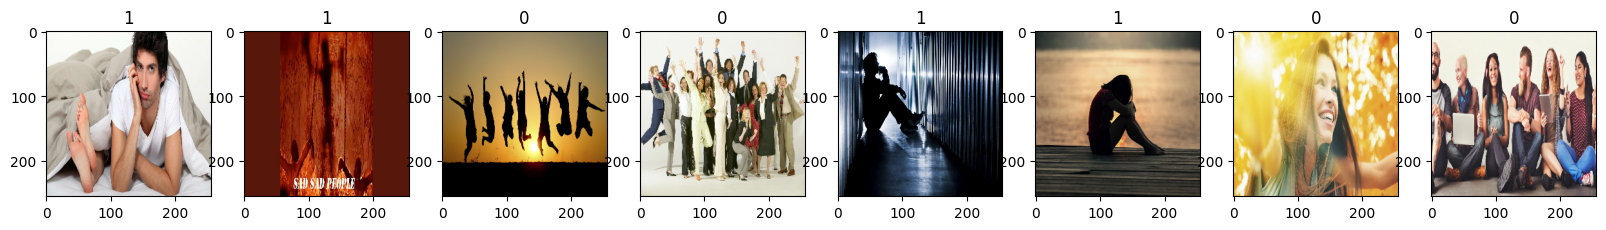

In [29]:
fig, ax = plt.subplots(ncols=8, figsize=(20,20))
for idx, img in enumerate(batch[0][:8]):
    ax[idx].imshow(img.astype(int))
    # ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [30]:
#so class 0 is happy and 1 is sad

In [31]:
scaled = batch[0]/255
scaled.max()


1.0

**PREPROCESS**

In [32]:
#scale image values to 0 and 1
data = data.map(lambda x,y: (x/255, y))
# 255 is max RGB value
#apply map_func to each element of the dataset and return new dataset containing the transformed elements

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [33]:
data.as_numpy_iterator().next()

(array([[[[0.67058825, 0.39215687, 0.54901963],
          [0.67058825, 0.39215687, 0.54901963],
          [0.6745098 , 0.39215687, 0.54901963],
          ...,
          [0.8392157 , 0.57254905, 0.52156866],
          [0.8308824 , 0.56421566, 0.5132353 ],
          [0.83186275, 0.5651961 , 0.5142157 ]],
 
         [[0.67058825, 0.39215687, 0.54901963],
          [0.67058825, 0.39215687, 0.54901963],
          [0.6745098 , 0.39215687, 0.54901963],
          ...,
          [0.8392157 , 0.57254905, 0.52156866],
          [0.8357843 , 0.56911767, 0.5181373 ],
          [0.83639705, 0.5697304 , 0.51875   ]],
 
         [[0.67058825, 0.39215687, 0.54901963],
          [0.67058825, 0.39215687, 0.54901963],
          [0.6745098 , 0.39215687, 0.54901963],
          ...,
          [0.8421569 , 0.56960785, 0.52156866],
          [0.84166664, 0.56911767, 0.5210784 ],
          [0.8387255 , 0.5661765 , 0.5181373 ]],
 
         ...,
 
         [[0.        , 0.        , 0.        ],
          [0.     

In [34]:
data.as_numpy_iterator().next()[0].max()

1.0

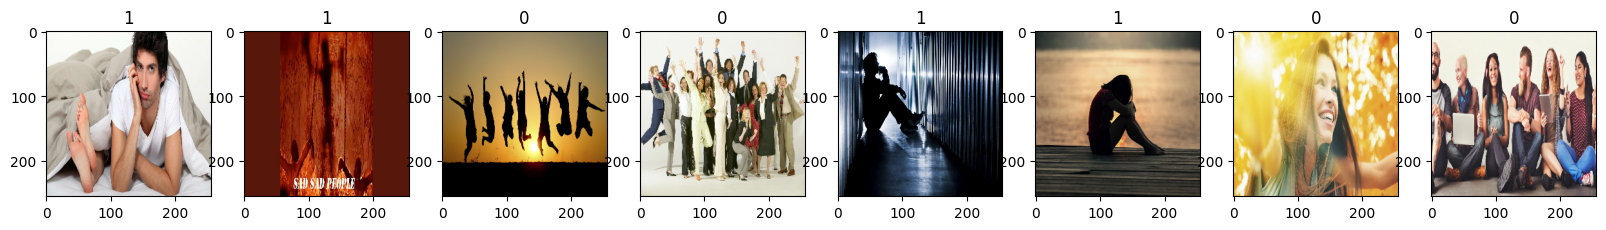

In [35]:
fig, ax = plt.subplots(ncols=8, figsize=(20,20))
for idx, img in enumerate(batch[0][:8]):
    ax[idx].imshow(img.astype(int))
    # ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [36]:
len(data)

7

In [37]:
#split_data
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1
# test_size = int(len(data)*.1)


In [38]:
train_size

4

In [39]:
val_size

2

In [40]:
test_size

1

In [41]:
#take: how much data we are taking
#skip batches already taken
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [42]:
len(val)

2

**MODELLING**

keras. build deep learning model

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten #dropout

In [62]:
model = Sequential()
# model = Sequential([Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)), (MaxPooling2D(), Conv2D(32, (3,3), 1, activation='relu'), MaxPooling2D())])

In [65]:
MaxPooling2D??

In [63]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256, 256, 3)))
# model.add(MaxPooling2D())
# model.add(Conv2D(32, (3,3), 1, activation='relu'))
# model.add(MaxPooling2D())
# model.add(Conv2D(16, (3,3), 1, activation='relu'))
# model.add(MaxPooling2D())
# model.add(Flatten())
# model.add(Dense(256, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))

In [64]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_18 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_19 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 30, 30, 16)      

In [66]:
#TRAIN
!mkdir logs
logdir='logs'

In [67]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [68]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
4/4 [==============================] - 20s 3s/step - loss: 1.1265 - accuracy: 0.5000 - val_loss: 0.6715 - val_accuracy: 0.5469
Epoch 2/20
4/4 [==============================] - 17s 4s/step - loss: 0.6750 - accuracy: 0.5703 - val_loss: 0.6490 - val_accuracy: 0.6562
Epoch 3/20
4/4 [==============================] - 18s 4s/step - loss: 0.6030 - accuracy: 0.7344 - val_loss: 0.5176 - val_accuracy: 0.7031
Epoch 4/20
4/4 [==============================] - 18s 4s/step - loss: 0.5015 - accuracy: 0.7422 - val_loss: 0.4332 - val_accuracy: 0.7656
Epoch 5/20
4/4 [==============================] - 17s 4s/step - loss: 0.4167 - accuracy: 0.7734 - val_loss: 0.3295 - val_accuracy: 0.9062
Epoch 6/20
4/4 [==============================] - 25s 6s/step - loss: 0.2544 - accuracy: 0.9219 - val_loss: 0.2242 - val_accuracy: 0.8906
Epoch 7/20
4/4 [==============================] - 19s 4s/step - loss: 0.2384 - accuracy: 0.8984 - val_loss: 0.1479 - val_accuracy: 0.9531
Epoch 8/20
4/4 [==================

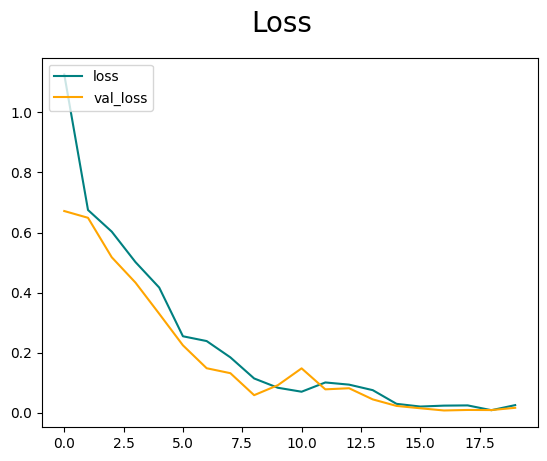

In [69]:
#PERFORMANCE
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

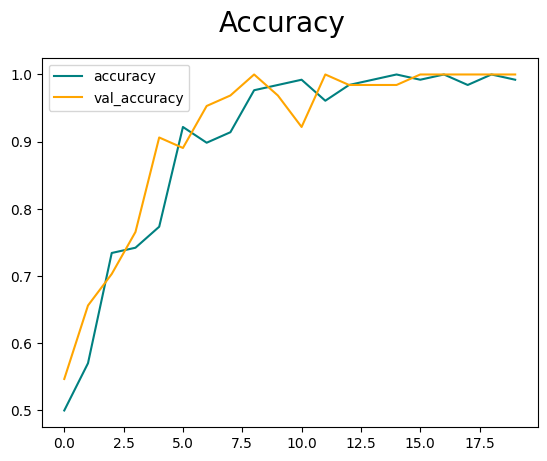

In [70]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

evaluate

In [71]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [72]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [73]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 188ms/step


In [74]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


TEST


In [76]:
import cv2
import time

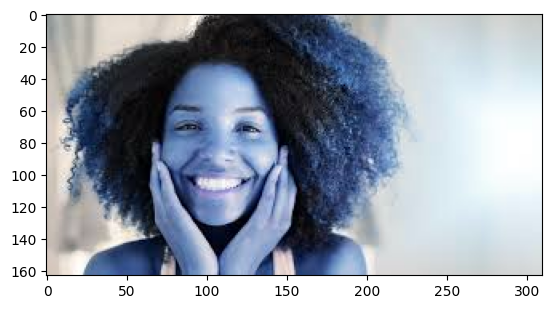

In [79]:
img = cv2.imread('image.jpeg')
plt.imshow(img)
plt.show()

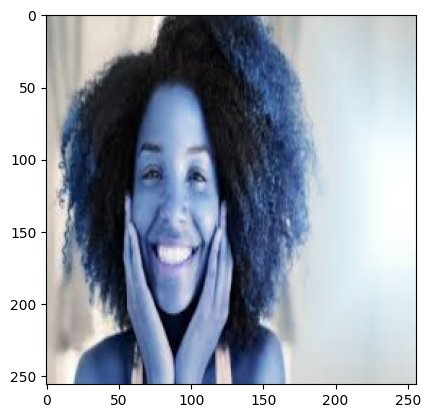

In [80]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [81]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 35ms/step


In [82]:
yhat

array([[0.9987972]], dtype=float32)

In [84]:
if yhat > 0.8:
    print(f'Predicted class is Happy')
    # cv2.putText(img, "happy", (10,170), cv2.FONT_HERSHEY_PLAIN, 3, (255,0,255), 3)
else:
    print(f'Predicted class is Sad')
    # cv2.putText(img, "sad", (10,170), cv2.FONT_HERSHEY_PLAIN, 3, (255,0,255), 3)

Predicted class is Happy


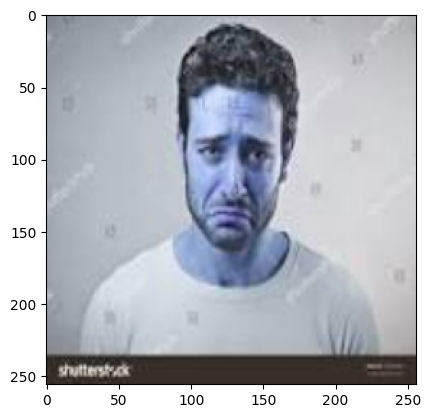

In [90]:
img = cv2.imread('sad.jpeg')
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [91]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat


1/1 [==============================] - 0s 34ms/step


array([[0.63939846]], dtype=float32)

In [92]:
if yhat > 0.8:
    print(f'Predicted class is Happy')
    # cv2.putText(img, "happy", (10,170), cv2.FONT_HERSHEY_PLAIN, 3, (255,0,255), 3)
else:
    print(f'Predicted class is Sad')
    # cv2.putText(img, "sad", (10,170), cv2.FONT_HERSHEY_PLAIN, 3, (255,0,255), 3)

Predicted class is Sad


In [93]:
#save the model
from tensorflow.keras.models import load_model

In [94]:
model.save(os.path.join('models','imageclassifier.h5'))

In [95]:
new_model = load_model('imageclassifier.h5')
new_model.predict(np.expand_dims(resize/255, 0))

OSError: No file or directory found at imageclassifier.h5